# Comparison of Salaries:

What are the average wages for data-related positions globally, and are there significant differences among various countries?

Which countries offer the highest average wages for data-related positions, and do specific job sub-types within data-related positions show significant variations in compensation among non-U.S. citizens?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
excel_salary = 'salary_data_states.xlsx'
df = pd.read_excel(excel_salary)


In [2]:
# Display the first few rows of the dataframe
pd.set_option('display.max_columns', None)
display(df.head())

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,EXPERIENCE_REQUIRED_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,BLOOMINGTON,NaN,NaN,NaN,NaN,NaN,15-1132,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,NaN,IRAN,25-1011,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,HARLINGEN CISD,NaN,NaN,NaN,NaN,NaN,25-1042,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,PORTLAND,NaN,NaN,NaN,NaN,NaN,15-1133,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [3]:
# Filter data for data-related positions
data_positions = ['data scientist', 'data analyst']
df_data = df[df['JOB_TITLE_SUBGROUP'].isin(data_positions)]


In [4]:

# Display the average wage by country
group_country = df_data.groupby('COUNTRY_OF_CITIZENSHIP')[['PAID_WAGE_PER_YEAR']].mean()
group_country.rename(columns={'PAID_WAGE_PER_YEAR': 'AVERAGE_WAGE'},
                     inplace=True)

display(group_country.head())



,AVERAGE_WAGE
COUNTRY_OF_CITIZENSHIP,
ALBANIA,60000.000000
ARGENTINA,129936.900000
BRAZIL,81370.000000
BULGARIA,70366.000000
CANADA,93438.333333


In [5]:
# Display the top 10 countries by average wage
group_country_sorted = group_country.sort_values('AVERAGE_WAGE', ascending=False)

display(group_country_sorted.head(10))



,AVERAGE_WAGE
COUNTRY_OF_CITIZENSHIP,
HUNGARY,140000.000000
SPAIN,138536.000000
UNITED KINGDOM,130000.000000
ARGENTINA,129936.900000
NETHERLANDS,120000.000000
GERMANY,116666.000000
SINGAPORE,110000.000000
INDIA,106582.757303
ITALY,105000.220000


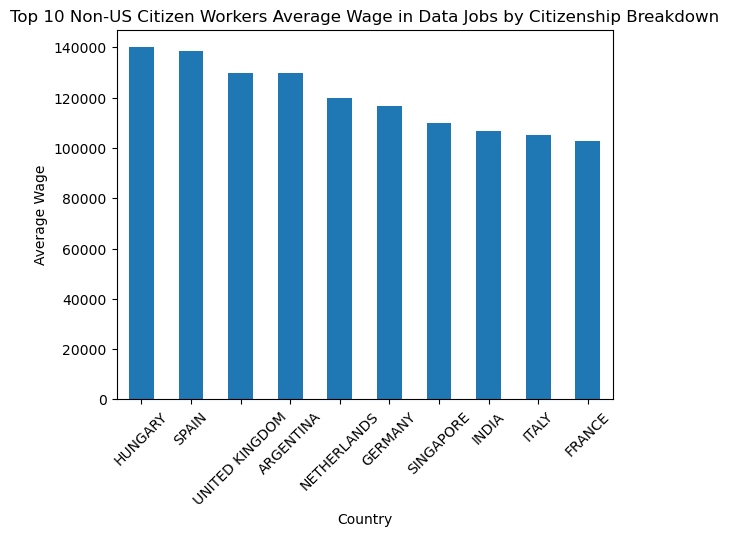

In [6]:
# Create a bar chart showing the top 10 highest paying countries for data-related positions
top_10_countries = group_country_sorted.head(10)

# Create bar chart
top_10_countries['AVERAGE_WAGE'].plot(kind='bar')
plt.title('Top 10 Non-US Citizen Workers Average Wage in Data Jobs by Citizenship Breakdown')
plt.xlabel('Country')
plt.ylabel('Average Wage')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Analyze disparities in prevailing wages for U.S. and non-U.S. workers
us_workers = df_data[df_data['COUNTRY_OF_CITIZENSHIP'] == 'UNITED STATES']
non_us_workers = df_data[df_data['COUNTRY_OF_CITIZENSHIP'] != 'UNITED STATES']
# Display summary statistics
display(us_workers['PAID_WAGE_PER_YEAR'].describe())
display(non_us_workers['PAID_WAGE_PER_YEAR'].describe())



count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: PAID_WAGE_PER_YEAR, dtype: float64

count      5067.000000
mean      79229.784111
std       28327.437664
min       29411.200000
25%       60000.000000
50%       70000.000000
75%       91426.500000
max      746323.000000
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [9]:
# Explore variations in compensation between U.S. and non-U.S. workers based on job sub-types or industries
group_job_subtype = df_data.groupby(['JOB_TITLE', 'COUNTRY_OF_CITIZENSHIP'])[['PAID_WAGE_PER_YEAR']].mean()
group_job_subtype.rename(columns={'PAID_WAGE_PER_YEAR': 'AVERAGE_WAGE'},
                         inplace=True)

# Display top job sub-types with variations
print("## Top 10 Highest-Paid Data Jobs for Non-US Workers")
display(group_job_subtype.sort_values('AVERAGE_WAGE', ascending=False).head(10))



## Top 10 Highest-Paid Data Jobs for Non-US Workers


AVERAGE_WAGE
JOB_TITLE                      COUNTRY_OF_CITIZENSHIP              
Technical Data Analyst         INDIA                      746323.00
Senior Data Scientist          CHINA                      175000.00
DATA SCIENTIST                 INDIA                      150000.00
Sr. Big Data Analyst           HUNGARY                    140000.00
DATA SCIENTIST                 SPAIN                      138536.00
Data Scientist                 GERMANY                    137506.00
                               FRANCE                     133766.43
                               INDIA                      131397.64
Staff Engineer, Data Scientist INDIA                      130000.00
Data Scientist                 TAIWAN                     130000.00